In [2]:
import warnings
warnings.filterwarnings("ignore")
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import math
import matplotlib.pyplot as plt
import contractions
import re
import random
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
additional  = ['rt','rts','retweet'] # lista adicional de stopwords
swords = set().union(stopwords.words('english'),additional) # adicionando palavras para o stopwords

pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# controla tamanho geral das figuras no matplotlib/seaborn
TAMANHO_GERAL = [15, 10]
plt.rcParams['figure.figsize'] = TAMANHO_GERAL
sns.set(rc={'figure.figsize' : TAMANHO_GERAL})

In [5]:
# https://www.kaggle.com/kaushiksuresh147/bitcoin-tweets
p = 0.005

dataFrame = pd.read_csv('Data/Bitcoin_tweets_6_2_2021.csv', skiprows=lambda i: i>0 and random.random() > p, lineterminator='\n' )
dataFrame['date'] = pd.to_datetime(twFrame['date']).dt.date
# twFrame = pd.read_csv('Data/Bitcoin_tweets_6_2_2021.csv')
dataFrame

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,@massumeh18 #RefinedWarrior #Activist,NOVA,Persistent. to the extreme... #FREEPALESTINE #...,2009-01-05 13:28:47,"1,159.00","2,185.00","30,852.00",False,2021-02-10,Annnd #btc #Bitcoin is headed even higher now....,"['btc', 'Bitcoin']",Twitter Web App,False
1,Andrew,NaN,$TSLA #Bitcoin $Nio \nFormula One,2012-07-16 23:23:58,560.00,590.00,"33,782.00",False,2021-02-10,"The writing is on the wall, and you are ignori...","['bitcoin', 'BTC']",Twitter Web App,False
2,#dogecoin,MOON,#Dogecoins #dogecoin #doge #dogecointo1dollar ...,2020-01-06 02:23:39,38.00,81.00,"1,068.00",False,2021-02-10,Pi is a new digital currency developed by doct...,NaN,Twitter Web App,False
3,DeveloperSteve,Planet Earth (for now),"Developer Advocate @IBMDeveloper, prev @telstr...",2011-02-25 08:26:43,"5,272.00","3,935.00","31,376.00",False,2021-02-10,In case anyones keen to get on the #btc moon t...,['btc'],Twitter Web App,False
4,DaniloS,"Berlin, Deutschland",#Bitcoin,2015-11-13 23:36:17,6.00,20.00,129.00,False,2021-02-10,@elonmusk make incredible profits #Bitcoin #BT...,"['Bitcoin', 'BTC', 'Tesla', 'Apple']",Twitter for iPhone,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7392,InplainSight,NaN,Identify what hidden in plain view,2021-03-02 14:39:16,181.00,799.00,"6,227.00",False,NaN,"@sweetsinner3 Ladies and Gents, DBA token is l...","['Crypto', 'Bullrunning', 'Investments', 'Inve...",Twitter for Android,False
7393,Cardano Feed,Alonzo Era,News aggregator about #Cardano (ADA) for every...,2021-03-20 18:02:20,"15,910.00","5,247.00","5,011.00",False,NaN,Greed Postpones Cardano until Q1 2022 to Launc...,"['Cardano', 'cardanofeed', 'ADA', 'crypto', 'c...",IFTTT,False
7394,CryptoDude,NaN,NaN,2021-09-28 07:31:00,12.00,196.00,30.00,False,NaN,@cribberswap Great project sir! Hope it will g...,"['Airdrop', 'Giveaway', 'BSC', 'BTC', 'ETH', '...",Twitter Web App,False
7395,DYOR.net,Internet,"https://t.co/Qykbgsea8v makes your Binance, Ku...",2018-01-03 13:46:13,"74,841.00",537.00,638.00,False,NaN,[SCAN RESULTS - 15m]\n\nExchange: #KuCoin\n\nT...,"['KuCoin', 'BTC', 'USDT', 'KuCoin', 'Binance']",DYORCryptoBot,False


In [7]:
twFrame = dataFrame[['date','text']]
twFrame

,date,text
0,2021-02-10,Annnd #btc #Bitcoin is headed even higher now....
1,2021-02-10,"The writing is on the wall, and you are ignori..."
2,2021-02-10,Pi is a new digital currency developed by doct...
3,2021-02-10,In case anyones keen to get on the #btc moon t...
4,2021-02-10,@elonmusk make incredible profits #Bitcoin #BT...
...,...,...
7392,NaN,"@sweetsinner3 Ladies and Gents, DBA token is l..."
7393,NaN,Greed Postpones Cardano until Q1 2022 to Launc...
7394,NaN,@cribberswap Great project sir! Hope it will g...
7395,NaN,[SCAN RESULTS - 15m]\n\nExchange: #KuCoin\n\nT...


In [9]:
twText = twFrame[['text']]
twText

,text
0,Annnd #btc #Bitcoin is headed even higher now....
1,"The writing is on the wall, and you are ignori..."
2,Pi is a new digital currency developed by doct...
3,In case anyones keen to get on the #btc moon t...
4,@elonmusk make incredible profits #Bitcoin #BT...
...,...
7392,"@sweetsinner3 Ladies and Gents, DBA token is l..."
7393,Greed Postpones Cardano until Q1 2022 to Launc...
7394,@cribberswap Great project sir! Hope it will g...
7395,[SCAN RESULTS - 15m]\n\nExchange: #KuCoin\n\nT...


In [10]:
twText['text'] = twText['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0]) # remove urls
twText['text'] = twText['text'].str.replace('\d+', '') # remove valores numericos
twText.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
text = twText['text'][0]
text

'Annnd #btc #Bitcoin is headed even higher now... '

In [11]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub("@[A-Za-z0-9_]+","", text) #remove menções
    text = re.sub(r'#[a-zA-z0-9]+','',text) # remove hashtag
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)        
    text = re.sub('[()!?]', ' ', text)
    text = re.sub('\[.*?\]',' ', text)
    text = re.sub("[^a-z0-9]"," ", text)
    text = contractions.fix(text)
    # text = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI)
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    # words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

In [12]:
twFrame['cleantext']=twText['text'].map(lambda x: tweet_to_words(x))
twFrame

,date,text,cleantext
0,2021-02-10,Annnd #btc #Bitcoin is headed even higher now....,"[annnd, headed, even, higher]"
1,2021-02-10,"The writing is on the wall, and you are ignori...","[writing, wall, ignoring]"
2,2021-02-10,Pi is a new digital currency developed by doct...,"[pi, new, digital, currency, developed, doctor..."
3,2021-02-10,In case anyones keen to get on the #btc moon t...,"[case, anyones, keen, get, moon, train, late, ..."
4,2021-02-10,@elonmusk make incredible profits #Bitcoin #BT...,"[make, incredible, profits, copy, trading, fol..."
...,...,...,...
7392,NaN,"@sweetsinner3 Ladies and Gents, DBA token is l...","[ladies, gents, dba, token, live, pancakeswipe..."
7393,NaN,Greed Postpones Cardano until Q1 2022 to Launc...,"[greed, postpones, cardano, q, launch, binance..."
7394,NaN,@cribberswap Great project sir! Hope it will g...,"[great, project, sir, hope, grow, big]"
7395,NaN,[SCAN RESULTS - 15m]\n\nExchange: #KuCoin\n\nT...,"[scan, results, exchange, top, bullish, trend,..."


In [13]:
pd.DatetimeIndex(twFrame["date"]).date

array([datetime.date(2021, 2, 10), datetime.date(2021, 2, 10),
       datetime.date(2021, 2, 10), ..., NaT, NaT, NaT], dtype=object)

In [14]:
# import contractions
# text = '''She'd like to know how I'd done that! 
#           She's going to the park and I don't think I'll be home for dinner.
#           Theyre going to the zoo and she'll be home for dinner.'''
  
# text = contractions.fix(text)
# print(text)

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
    
    return sentiment_dict['compound']
     
 
    # decide sentiment as positive, negative and neutral
#     if sentiment_dict['compound'] >= 0.05 :
#         return "Positive"
 
#     elif sentiment_dict['compound'] <= - 0.05 :
#          return  "Negative"
 
#     else :
#          return "Neutral"

In [16]:
%%time
sentimental = [sentiment_scores(i) for i in twFrame['cleantext']]

twFrame["Sentimento"] = sentimental
twFrame["Sentimento"]

CPU times: user 1min 6s, sys: 968 ms, total: 1min 7s
Wall time: 1min 7s


0      0.00
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
7392   0.00
7393   0.00
7394   0.00
7395   0.00
7396   0.00
Name: Sentimento, Length: 7397, dtype: float64

In [17]:
twFrame["Sentimento"].describe()

count   7,397.00
mean        0.00
std         0.04
min        -0.65
25%         0.00
50%         0.00
75%         0.00
max         0.64
Name: Sentimento, dtype: float64

<AxesSubplot:xlabel='date'>

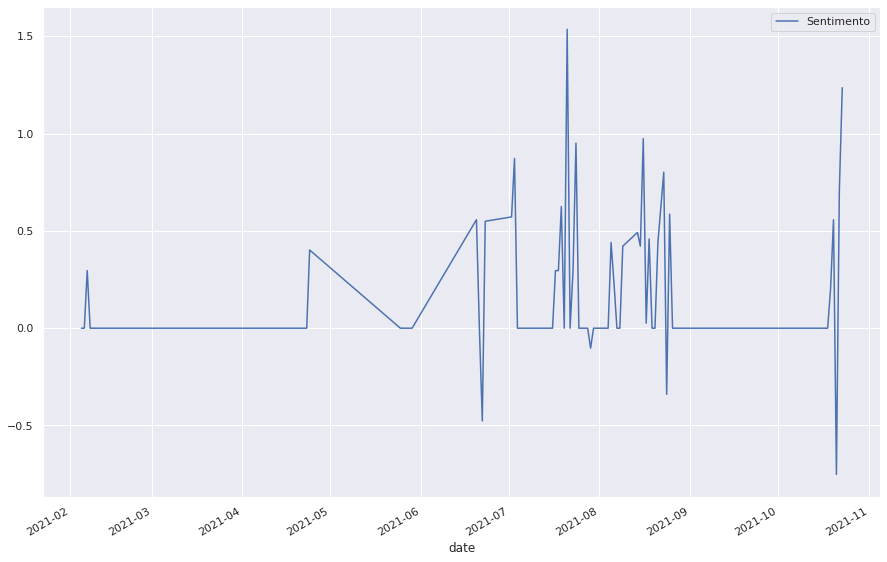

In [72]:
pd.DatetimeIndex(twFrame['date']).normalize()
# twFrame.groupby(pd.DatetimeIndex(twFrame['date']).normalize())['Sentimento'].sum().sort_values()
twFrame.groupby(pd.DatetimeIndex(twFrame['date']).normalize())['Sentimento'].sum().plot(legend=True)


In [53]:
# twFrame[(twFrame["Sentimento"].sort_values() > 0.2) | (twFrame["Sentimento"].sort_values() < -0.2) ]
# twFrame.groupby(pd.DatetimeIndex(twFrame['date']).normalize())['Sentimento'].sum()
g = twFrame.groupby(pd.DatetimeIndex(twFrame['date']).normalize()).sum()
g.reset_index(inplace = True)
g

,Sentimento
date,
2021-02-05,0.00
2021-02-06,0.00
2021-02-07,0.30
2021-02-08,0.00
2021-02-09,0.00
...,...
2021-10-19,0.20
2021-10-20,0.56
2021-10-21,-0.75


In [90]:

minmaxpoints = g[ (g['Sentimento'] >= 0.2) | (g['Sentimento'] <= -0.2) ]
minmaxpoints['date'] = pd.to_datetime(minmaxpoints['date']).dt.date
# minmaxpoints['date'] = pd.to_datetime(minmaxpoints['date'], format='%y-%m-%d')
minmaxpoints

,date,Sentimento
2,2021-02-07,0.30
28,2021-04-24,0.40
34,2021-06-20,0.56
36,2021-06-22,-0.48
37,2021-06-23,0.55
38,2021-07-02,0.57
39,2021-07-03,0.87
43,2021-07-17,0.30
44,2021-07-18,0.30
45,2021-07-19,0.62


In [132]:
minmaxpoints['date'] = minmaxpoints['date'].astype(str)
aa = list(minmaxpoints['date'])
aa

['2021-02-07',
 '2021-04-24',
 '2021-06-20',
 '2021-06-22',
 '2021-06-23',
 '2021-07-02',
 '2021-07-03',
 '2021-07-17',
 '2021-07-18',
 '2021-07-19',
 '2021-07-21',
 '2021-07-23',
 '2021-07-24',
 '2021-08-05',
 '2021-08-06',
 '2021-08-09',
 '2021-08-14',
 '2021-08-15',
 '2021-08-16',
 '2021-08-18',
 '2021-08-21',
 '2021-08-23',
 '2021-08-24',
 '2021-08-25',
 '2021-10-19',
 '2021-10-20',
 '2021-10-21',
 '2021-10-22',
 '2021-10-23']

In [79]:
btcPrice = pd.read_csv('Data/BTC-USD_otc272020_oct272021.csv')
# btcPrice[btcPrice['Date'] == '2021-02-08']
btcPrice

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-28,"13,654.21","13,837.70","12,932.25","13,271.29","13,271.29",35867318895
1,2020-10-29,"13,271.30","13,612.05","12,980.06","13,437.88","13,437.88",56499499598
2,2020-10-30,"13,437.87","13,651.52","13,136.20","13,546.52","13,546.52",30581485201
3,2020-10-31,"13,546.53","14,028.21","13,457.53","13,781.00","13,781.00",30306464719
4,2020-11-01,"13,781.00","13,862.03","13,628.38","13,737.11","13,737.11",24453857900
...,...,...,...,...,...,...,...
361,2021-10-24,"61,368.34","61,505.80","59,643.34","60,930.84","60,930.84",27316183882
362,2021-10-25,"60,893.93","63,729.32","60,691.80","63,039.82","63,039.82",31064911614
363,2021-10-26,"63,032.76","63,229.03","59,991.16","60,363.79","60,363.79",34878965587
364,2021-10-27,"60,352.00","61,435.18","58,208.19","58,482.39","58,482.39",43657076893


In [114]:
# btcPrice.loc[btcPrice['Date'] == teste]
btcPrice[btcPrice['Date'] == teste]
    

,Date,Open,High,Low,Close,Adj Close,Volume
102,2021-02-07,"39,250.19","39,621.84","37,446.15","38,903.44","38,903.44",65500641143


In [169]:
# btcPrice.loc[btcPrice['Date'].isin([aa])]
zz = btcPrice.query('Date in @aa')
zz
btcPrice.loc[zz.index,'teste'] = True
btcPrice['teste'] = btcPrice['teste'].replace(np.nan,False)
btcPrice['Date']

0      2020-10-28
1      2020-10-29
2      2020-10-30
3      2020-10-31
4      2020-11-01
          ...    
361    2021-10-24
362    2021-10-25
363    2021-10-26
364    2021-10-27
365    2021-10-28
Name: Date, Length: 366, dtype: object

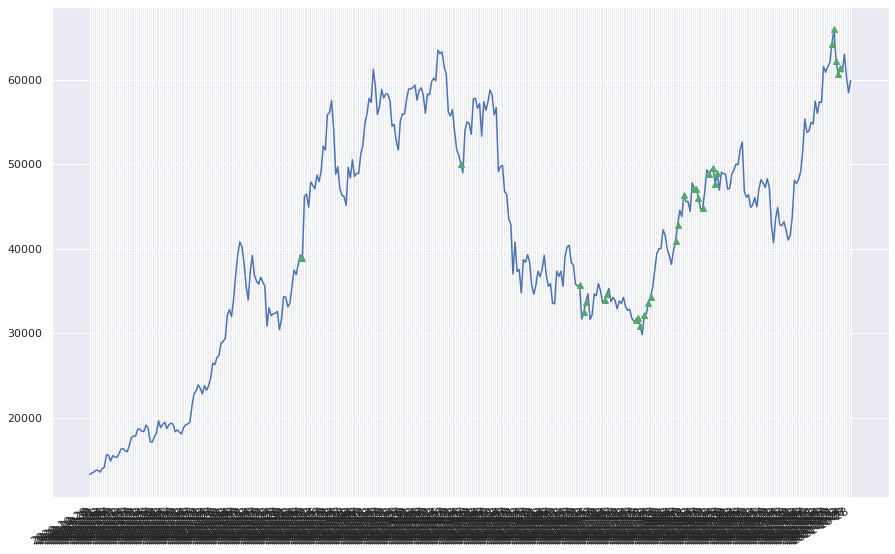

In [170]:
# btcPrice.plot(x='Date', y=['Close','teste'])


# fig, ax1 = plt.subplots()
# ax1.plot(btcPrice['Date'],btcPrice['Close'])
# ax1.plot(btcPrice['Date'],btcPrice['teste'],marker='o')

ts = btcPrice['Close'] 
ts2 = ts[btcPrice['teste']]

fig, ax1 = plt.subplots()
ax1.plot(btcPrice['Date'], ts)       
ax1.plot(ts2.index, ts2,'g^')
fig.autofmt_xdate()